# DATA GATHERING AND EDA

In [73]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d

In [97]:
    #read the data - the data is in SPSS format
df, meta = prs.read_sav('W35_May18/ATP W35.sav')
    #Read the data with the labels in csv format
df_label = pd.read_csv('W35_May18/ATP W35.csv')

In [98]:
    #Check the data
print(df.shape)
df.head()

(4594, 190)


,QKEY,Device_Type_W35,LANGUAGE_W35,FORM_W35,ALG1_W35,ECIMPA_W35,ECIMPB_W35,ECIMPC_W35,ECIMPD_W35,ECIMPE_W35,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL,F_REG_FINAL,F_IDEO_FINAL,F_INTUSER_FINAL,F_VOLSUM_FINAL,WEIGHT_W35
0,100197.0,2.0,9.0,1.0,1.0,3.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,3.0,3.0,1.0,3.0,1.0,1.0,0.295954
1,100260.0,2.0,9.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,...,1.0,NaN,1.0,6.0,2.0,1.0,1.0,1.0,2.0,0.414951
2,100314.0,1.0,9.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,...,1.0,NaN,1.0,4.0,2.0,1.0,2.0,1.0,1.0,0.187774
3,100363.0,1.0,9.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,...,2.0,NaN,2.0,8.0,1.0,1.0,3.0,1.0,2.0,1.205720
4,100446.0,3.0,9.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,7.0,1.0,1.0,4.0,1.0,1.0,0.110696


In [99]:
df_label.head()

,QKEY,Device_Type_W35,LANGUAGE_W35,FORM_W35,ALG1_W35,ECIMPA_W35,ECIMPB_W35,ECIMPC_W35,ECIMPD_W35,ECIMPE_W35,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL,F_REG_FINAL,F_IDEO_FINAL,F_INTUSER_FINAL,F_VOLSUM_FINAL,WEIGHT_W35
0,100197,Tablet,English,Form 1,It is possible for computer programs to make d...,About the right amount,Too much power and influence,Not enough power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"20 to under $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,Yes,0.295954
1,100260,Tablet,English,Form 2,Computer programs will always reflect the bias...,,,,,About the right amount,...,Republican,,Rep/lean Rep,"50 to under $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Internet User,No,0.414951
2,100314,Mobile phone,English,Form 1,Computer programs will always reflect the bias...,Too much power and influence,Not enough power and influence,Too much power and influence,Too much power and influence,,...,Republican,,Rep/lean Rep,"30 to under $40,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.187774
3,100363,Mobile phone,English,Form 1,It is possible for computer programs to make d...,About the right amount,Too much power and influence,Too much power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"100 to under $150,000 [OR]","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,1.205720
4,100446,Desktop,English,Form 1,Computer programs will always reflect the bias...,Too much power and influence,Too much power and influence,Not enough power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"75 to under $100,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,Yes,0.110696


In [4]:
len(df)

4594

In [5]:
col = list(df.columns)
col

['QKEY',
 'Device_Type_W35',
 'LANGUAGE_W35',
 'FORM_W35',
 'ALG1_W35',
 'ECIMPA_W35',
 'ECIMPB_W35',
 'ECIMPC_W35',
 'ECIMPD_W35',
 'ECIMPE_W35',
 'ECIMPF_W35',
 'ECIMPG_W35',
 'ECIMPH_W35',
 'TC2A_W35',
 'TC2B_W35',
 'TC2C_W35',
 'TC3A_W35',
 'TC3B_W35',
 'TC3C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'TC6B_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SNSL_W35',
 'SNSUSER_W35',
 'SNSFRA_W35',
 'SNSFRB_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM2A_W35',
 'SM2B_W35',
 'SM2C_W35',
 'SM2D_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM5A_W35',
 'SM5B_W35',
 'SM5C_W35',
 'SM5D_W35',
 'SM6A_W35',
 'SM6B_W35',
 'SM7_W35',
 'SM8A_W35',
 'SM8B_W35',
 'SM8C_W35',
 'SM9A_W35',
 'SM9B_W35',
 'SM9C_W35',
 'SM9D_W35',
 'SM9E_W35',
 'SM10A_W35',
 'SM10B_W35',
 'SM10C_W35',
 'SM10D_W35',
 'SM10E_W35',
 'SM11_W35',
 'SM12A_W35',
 'SM12B_W35',
 'SM12C_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 

In [6]:
len(col)

190

In [100]:
#Check the target variables for eventual class imbalance
df.ALG1_W35.value_counts()

2.0     2790
1.0     1713
99.0      91
Name: ALG1_W35, dtype: int64

In [101]:
df_label.ALG1_W35.value_counts()

Computer programs will always reflect the biases of the people who designed them    2790
It is possible for computer programs to make decisions without human bias           1713
Refused                                                                               91
Name: ALG1_W35, dtype: int64

In [102]:
#remove the non answer
df = df[df.ALG1_W35 != 99]
df_label = df_label[df_label.ALG1_W35 != 'Refused']

In [103]:
df.ALG1_W35.value_counts()

2.0    2790
1.0    1713
Name: ALG1_W35, dtype: int64

In [104]:
df_label.ALG1_W35.value_counts()

Computer programs will always reflect the biases of the people who designed them    2790
It is possible for computer programs to make decisions without human bias           1713
Name: ALG1_W35, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4593
Columns: 190 entries, QKEY to WEIGHT_W35
dtypes: float64(190)
memory usage: 6.6 MB


In [11]:
col

['QKEY',
 'Device_Type_W35',
 'LANGUAGE_W35',
 'FORM_W35',
 'ALG1_W35',
 'ECIMPA_W35',
 'ECIMPB_W35',
 'ECIMPC_W35',
 'ECIMPD_W35',
 'ECIMPE_W35',
 'ECIMPF_W35',
 'ECIMPG_W35',
 'ECIMPH_W35',
 'TC2A_W35',
 'TC2B_W35',
 'TC2C_W35',
 'TC3A_W35',
 'TC3B_W35',
 'TC3C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'TC6B_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SNSL_W35',
 'SNSUSER_W35',
 'SNSFRA_W35',
 'SNSFRB_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM2A_W35',
 'SM2B_W35',
 'SM2C_W35',
 'SM2D_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM5A_W35',
 'SM5B_W35',
 'SM5C_W35',
 'SM5D_W35',
 'SM6A_W35',
 'SM6B_W35',
 'SM7_W35',
 'SM8A_W35',
 'SM8B_W35',
 'SM8C_W35',
 'SM9A_W35',
 'SM9B_W35',
 'SM9C_W35',
 'SM9D_W35',
 'SM9E_W35',
 'SM10A_W35',
 'SM10B_W35',
 'SM10C_W35',
 'SM10D_W35',
 'SM10E_W35',
 'SM11_W35',
 'SM12A_W35',
 'SM12B_W35',
 'SM12C_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 

In [105]:
#Make a selection of columns I would keep for the study
cols_features = ['ALG1_W35','TC2A_W35','TC2C_W35','TC4_W35','TC5_W35','TC6A_W35','SNSA_W35',
                 'SNSB_W35','SNSE_W35','SNSH_W35','SNSJ_W35', 'SM1A_W35','SM1B_W35','SM1C_W35',
                 'SM1D_W35','SM1E_W35','SM1F_W35','SM3_W35','SM4A_W35','SM4B_W35','SM4C_W35',
                 'SM4D_W35','SM11_W35','SM13A_W35','SM13B_W35','SM13C_W35','F_AGECAT_FINAL',
                 'F_SEX_FINAL','F_MARITAL_FINAL','F_RELIG_FINAL','F_INCOME_FINAL','F_INCOME_RECODE_FINAL']

In [106]:
print(cols_features,'\n')
print(len(cols_features))

['ALG1_W35', 'TC2A_W35', 'TC2C_W35', 'TC4_W35', 'TC5_W35', 'TC6A_W35', 'SNSA_W35', 'SNSB_W35', 'SNSE_W35', 'SNSH_W35', 'SNSJ_W35', 'SM1A_W35', 'SM1B_W35', 'SM1C_W35', 'SM1D_W35', 'SM1E_W35', 'SM1F_W35', 'SM3_W35', 'SM4A_W35', 'SM4B_W35', 'SM4C_W35', 'SM4D_W35', 'SM11_W35', 'SM13A_W35', 'SM13B_W35', 'SM13C_W35', 'F_AGECAT_FINAL', 'F_SEX_FINAL', 'F_MARITAL_FINAL', 'F_RELIG_FINAL', 'F_INCOME_FINAL', 'F_INCOME_RECODE_FINAL'] 

32


In [107]:
#Create a data frame with only the selected columns
data = df[cols_features]

In [108]:
data_with_label = df[cols_features]

In [109]:
data.shape

(4503, 32)

In [110]:
data.head()

,ALG1_W35,TC2A_W35,TC2C_W35,TC4_W35,TC5_W35,TC6A_W35,SNSA_W35,SNSB_W35,SNSE_W35,SNSH_W35,...,SM11_W35,SM13A_W35,SM13B_W35,SM13C_W35,F_AGECAT_FINAL,F_SEX_FINAL,F_MARITAL_FINAL,F_RELIG_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0,3.0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,4.0,1.0,6.0,12.0,6.0,2.0
2,2.0,3.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,...,NaN,3.0,2.0,3.0,4.0,1.0,2.0,1.0,4.0,2.0
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,1.0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,2.0,6.0,11.0,7.0,1.0


In [111]:
data.F_SEX_FINAL.value_counts()

1.0    2260
2.0    2243
Name: F_SEX_FINAL, dtype: int64

In [39]:
data.dtypes

ALG1_W35                 float64
TC2A_W35                 float64
TC2C_W35                 float64
TC4_W35                  float64
TC5_W35                  float64
TC6A_W35                 float64
SNSA_W35                 float64
SNSB_W35                 float64
SNSE_W35                 float64
SNSH_W35                 float64
SNSJ_W35                 float64
SM1A_W35                 float64
SM1B_W35                 float64
SM1C_W35                 float64
SM1D_W35                 float64
SM1E_W35                 float64
SM1F_W35                 float64
SM3_W35                  float64
SM4A_W35                 float64
SM4B_W35                 float64
SM4C_W35                 float64
SM4D_W35                 float64
SM11_W35                 float64
SM13A_W35                float64
SM13B_W35                float64
SM13C_W35                float64
F_AGECAT_FINAL           float64
F_SEX_FINAL              float64
F_MARITAL_FINAL          float64
F_RELIG_FINAL            float64
F_INCOME_F

In [95]:
#replace the value of the target variables by 1 and 2 and leave the features with 
df['ALG1_W35'] = df['ALG1_W35'].replace({'NOT FUNDED': 0, 'FUNDED': 1})

In [96]:
data_with_label = 

,ALG1_W35,TC2A_W35,TC2C_W35,TC4_W35,TC5_W35,TC6A_W35,SNSA_W35,SNSB_W35,SNSE_W35,SNSH_W35,...,SM11_W35,SM13A_W35,SM13B_W35,SM13C_W35,F_AGECAT_FINAL,F_SEX_FINAL,F_MARITAL_FINAL,F_RELIG_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0,3.0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,4.0,1.0,6.0,12.0,6.0,2.0
2,2.0,3.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,...,NaN,3.0,2.0,3.0,4.0,1.0,2.0,1.0,4.0,2.0
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,1.0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,2.0,6.0,11.0,7.0,1.0


# Change the name of the columns

# EDA

In [40]:
target = data.ALG1_W35

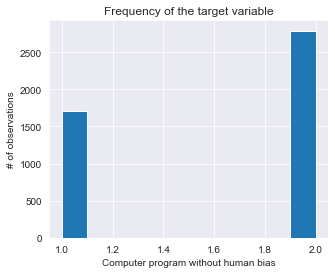

In [41]:
#Checking for class imbalance
sns.set_style('darkgrid')
target.hist(figsize=(5,4))
plt.title("Frequency of the target variable")
plt.xlabel("Computer program without human bias")
plt.ylabel("# of observations")
plt.show()

In [ ]:
cols_features.remove('ALG1_W35')

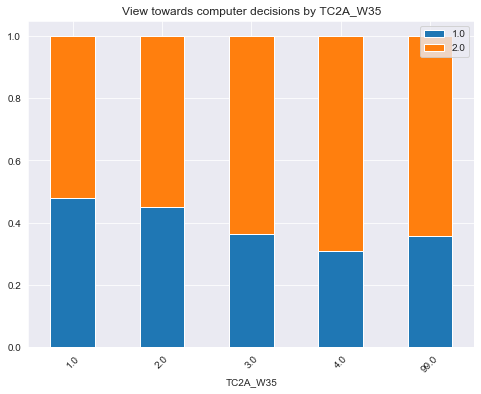

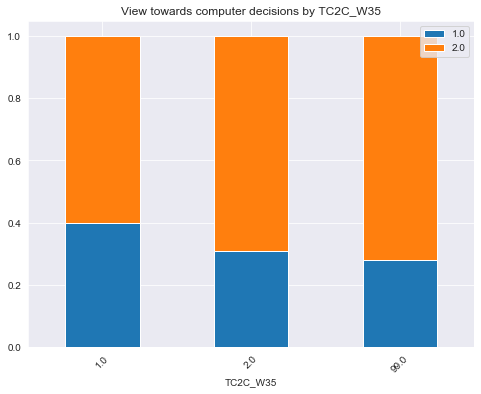

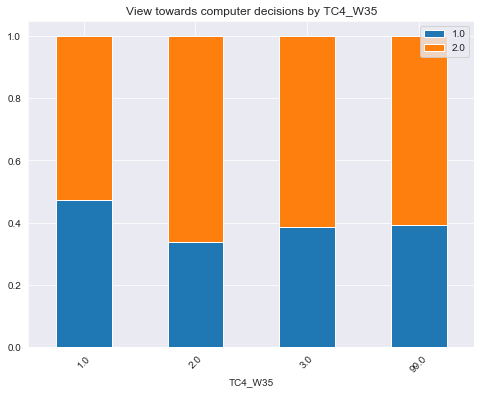

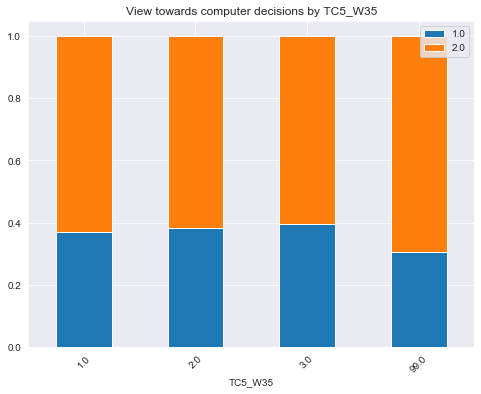

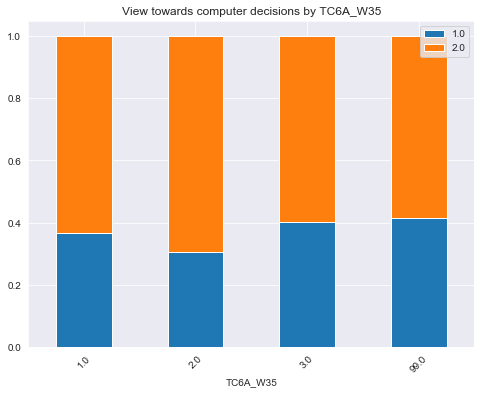

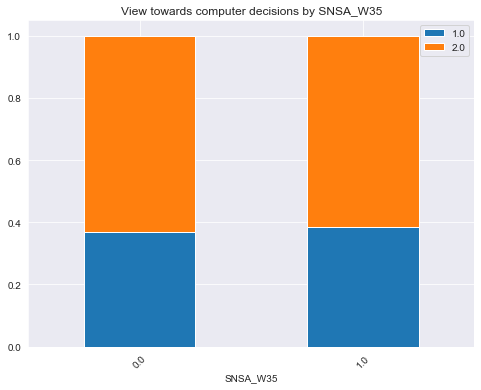

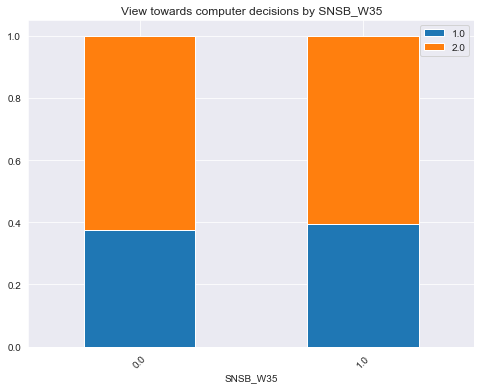

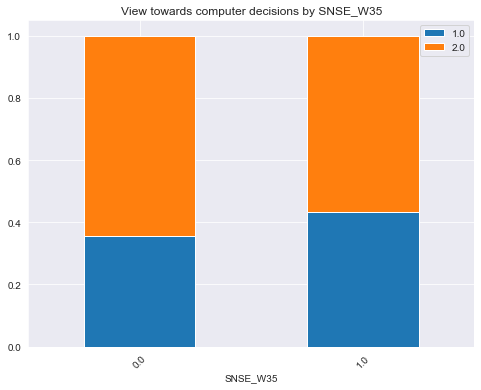

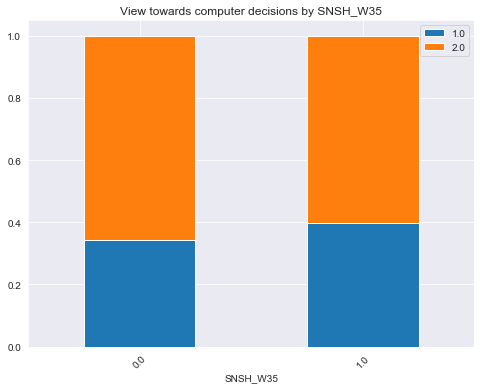

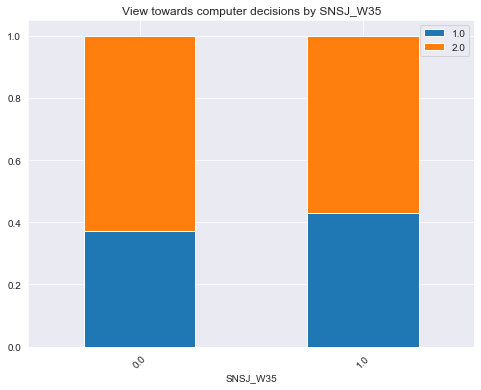

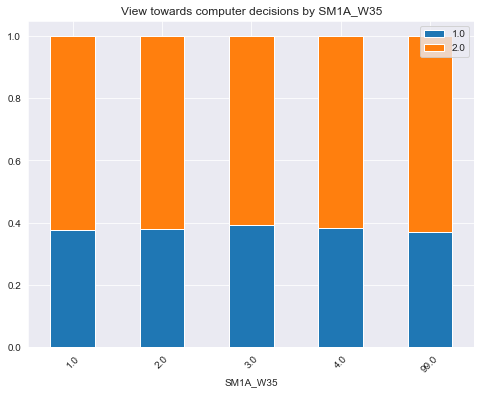

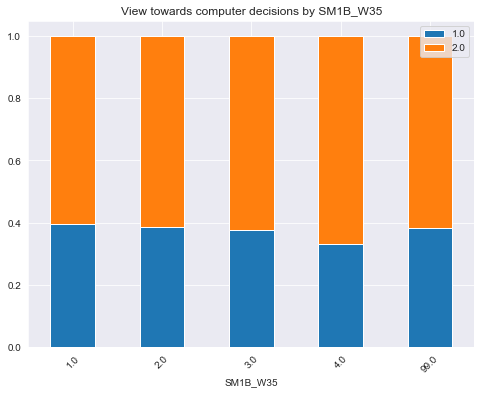

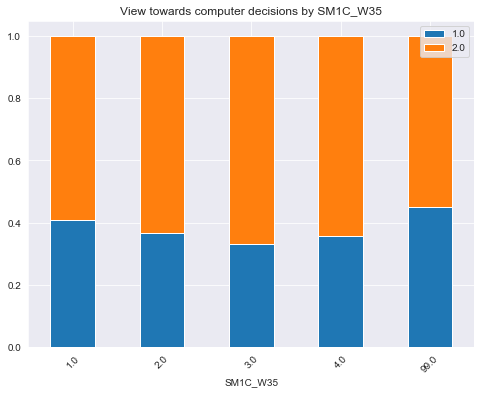

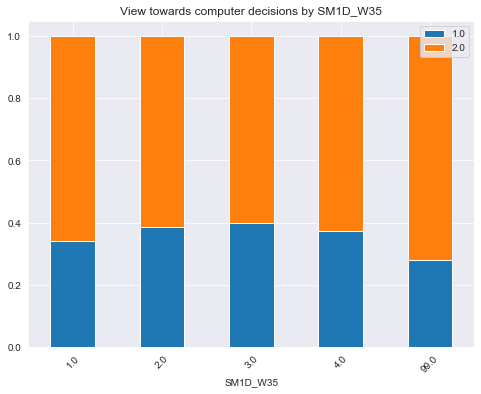

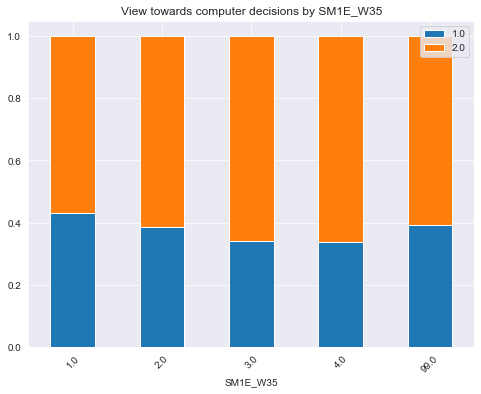

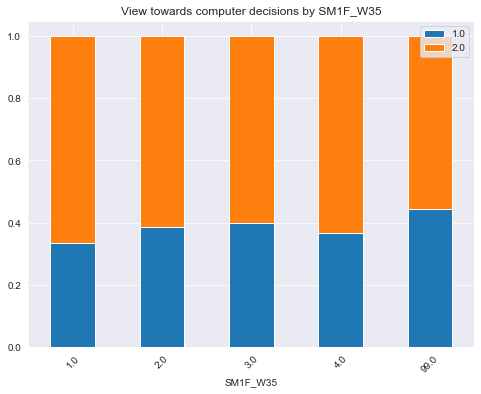

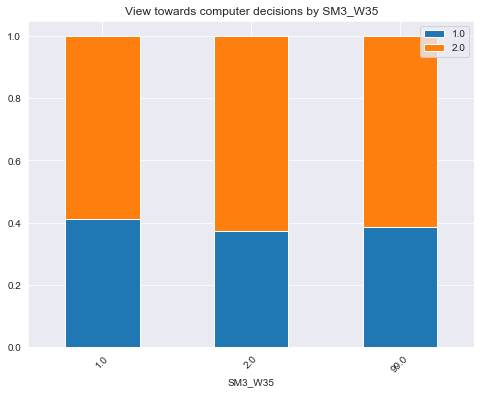

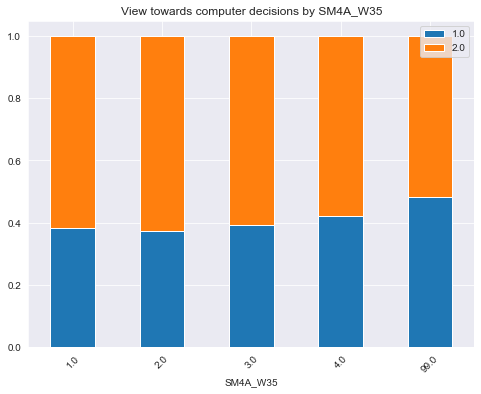

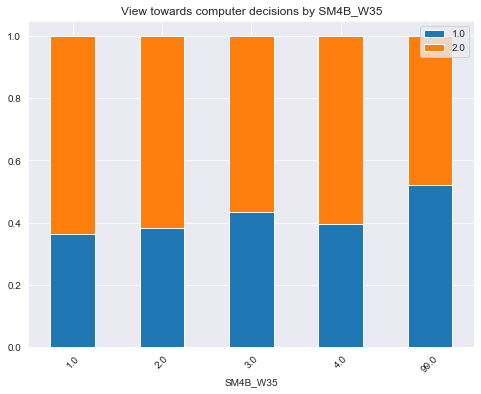

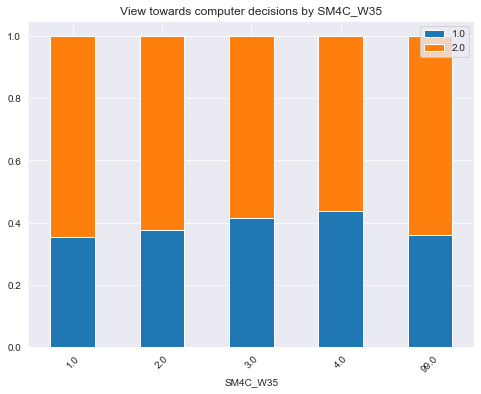

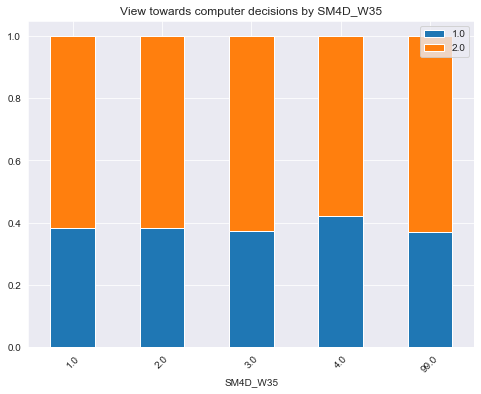

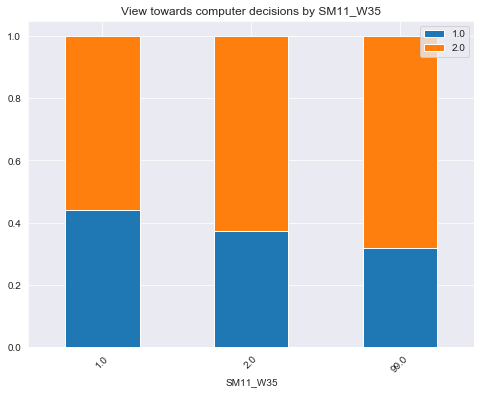

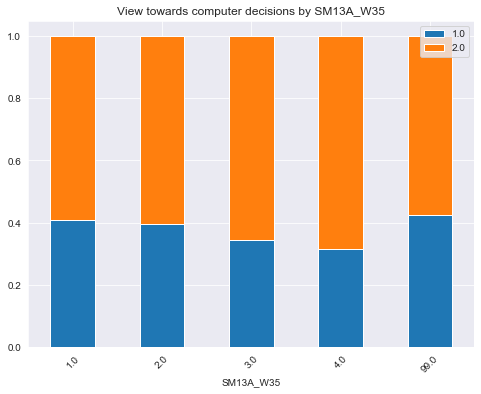

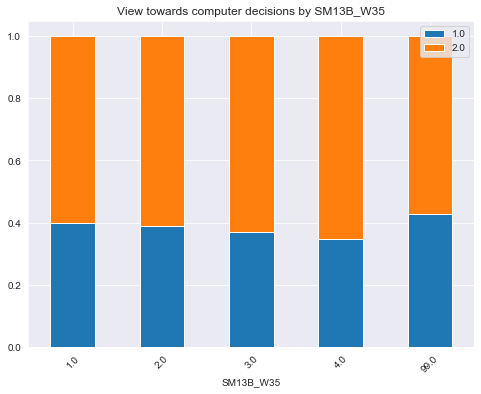

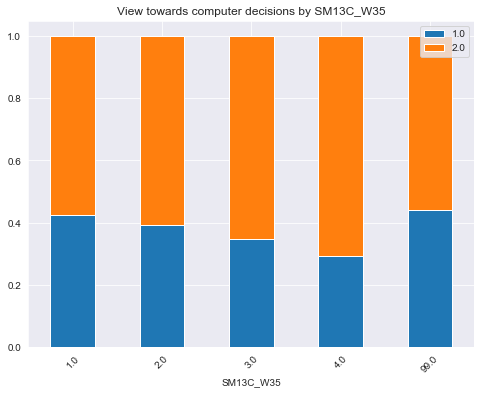

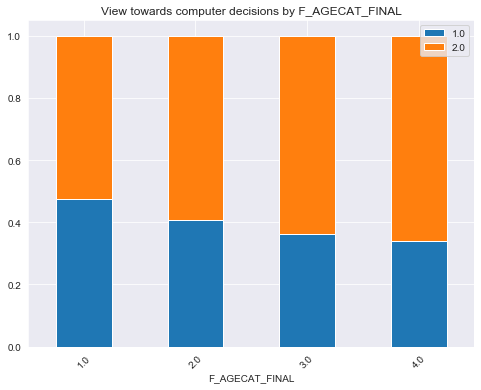

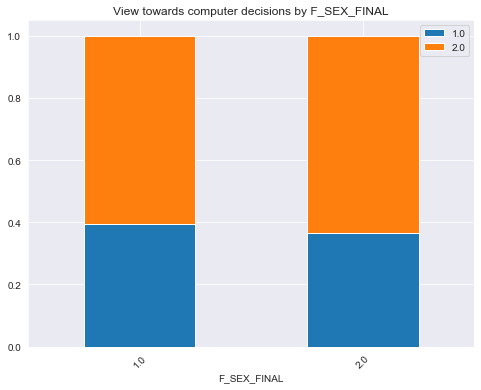

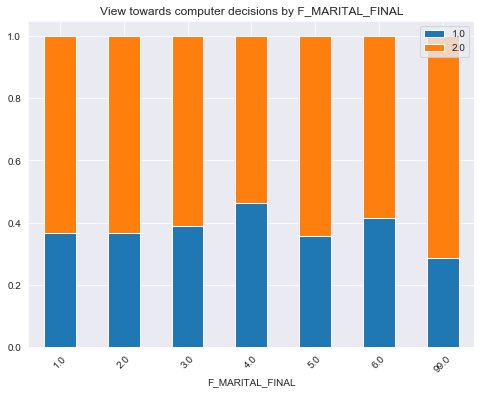

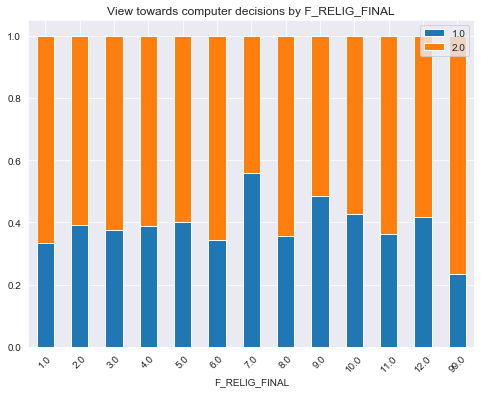

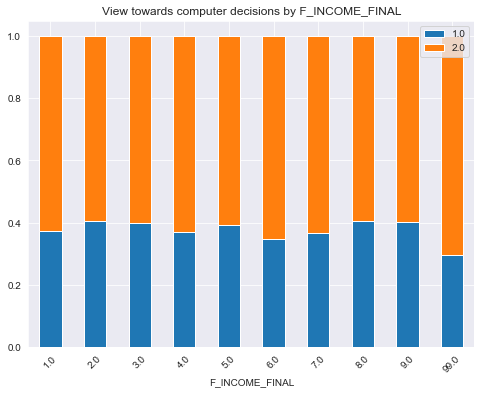

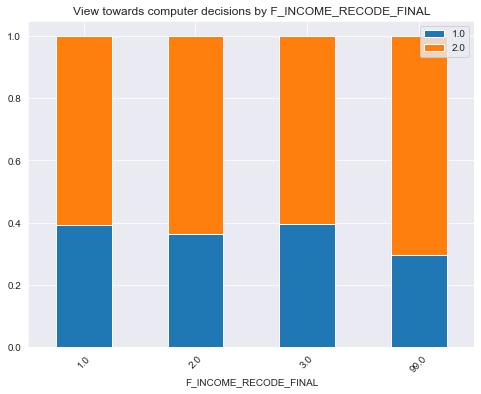

In [54]:
#Created a function to plot stacked bar to show interaction of features and target variable
def stacked_bar(var_1, var_2):
    
    x = data.groupby(var_1)[var_2].value_counts(normalize=True).unstack()
    x.plot(kind='bar', stacked='True', figsize=(8,6))
    plt.legend(loc=1)
    plt.title("View towards computer decisions by "+ var_1)
    plt.xticks(rotation=45)
    plt.show();

    
var_list = cols_features

for feature in var_list:
    
    stacked_bar(feature, 'ALG1_W35')

In [71]:
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

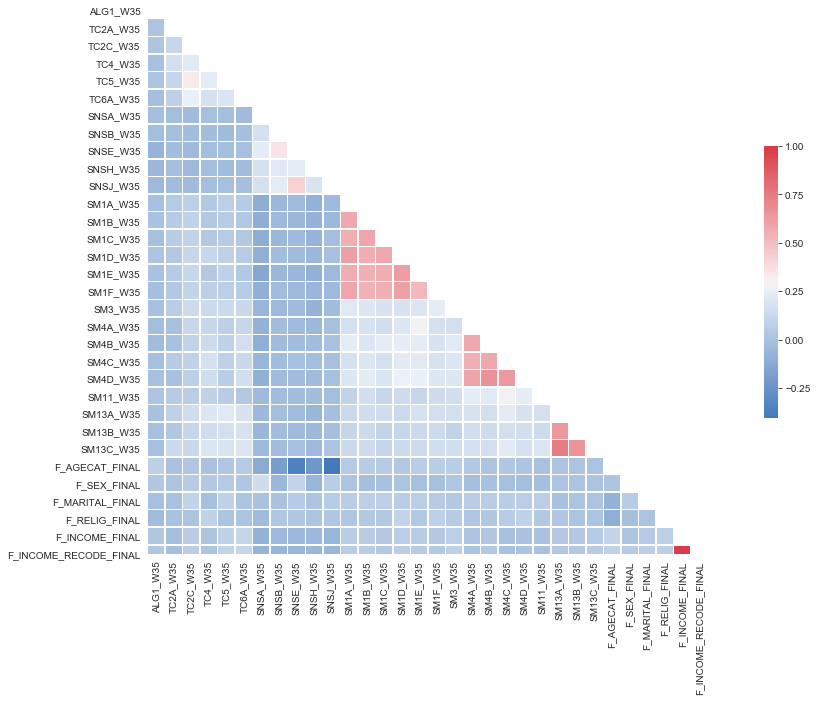

In [72]:
CorrMtx(data.corr(),dropDuplicates = True)

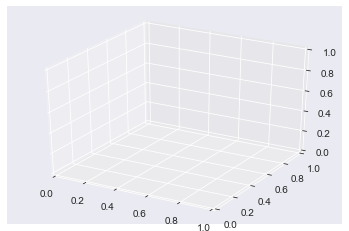

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')

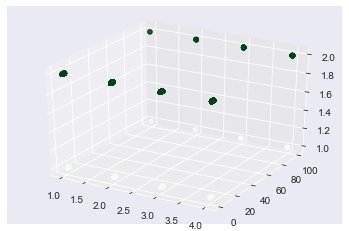

In [45]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = target
xdata = data.F_AGECAT_FINAL
ydata = data.F_INCOME_RECODE_FINAL
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# Remember to scale

# Remember to scale